In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


In [2]:
df=pd.read_csv("edited.csv")
df.head()

,level,goal,equipment,program_length,time_per_workout,total_exercises,Cluster_ID,Unnamed: 7,final_level,Unnamed: 9,final_goal
0,[ Intermediate ],[ Muscle & Sculpting Bodyweight Fitnes...,Full Gym,12.0,90.0,384.0,4.0,Intermediate,Intermediate,Muscle & Sculpting Bodyweight Fitness,Muscle & Sculpting Bodyweight Fitness
1,"[ Advanced , Intermediate ]",[ Bodybuilding ],Full Gym,8.0,60.0,224.0,3.0,"Advanced , Intermediate",Advanced Intermediate,Bodybuilding,Bodybuilding
2,"[ Beginner , Novice , Intermediate ]","[ Athletics , Powerlifting , Powerbuild...",Full Gym,6.0,90.0,237.0,0.0,"Beginner , Novice , Intermediate",Beginner Novice Intermediate,"Athletics , Powerlifting , Powerbuildi...",Athletics Powerlifting Powerbuilding
3,"[ Intermediate , Advanced ]",[ Powerbuilding ],Garage Gym,10.0,70.0,280.0,1.0,"Intermediate , Advanced",Intermediate Advanced,Powerbuilding,Powerbuilding
4,"[ Intermediate , Advanced ]","[ Powerbuilding , Powerlifting , Bodybu...",Full Gym,10.0,80.0,356.0,3.0,"Intermediate , Advanced",Intermediate Advanced,"Powerbuilding , Powerlifting , Bodybui...",Powerbuilding Powerlifting Bodybuild...


# Cluster ID
#0: "Structured Splits & Routines",      e.g., "4 Day Upper Lower", "PPL"
#1: "Branded & Goal-Oriented Programs",  e.g., "Tony's Program", "Aesthetics", "Beginner"
#2: "Hypertrophy & Muscle Focus",        e.g., "Muscle Gains", "Bodybuilding"
#3: "Home & General Fitness Workouts",   e.g., "Home workout", "Simple", "Bodyweight"
#4: "Powerlifting & Performance Focus"   e.g., "Powerlifting", "Strength", "Push Pull Legs"

# Removing columns

In [3]:
df=df.drop(["level","goal","Unnamed: 7","Unnamed: 9"],axis=1)
df.head()

,equipment,program_length,time_per_workout,total_exercises,Cluster_ID,final_level,final_goal
0,Full Gym,12.0,90.0,384.0,4.0,Intermediate,Muscle & Sculpting Bodyweight Fitness
1,Full Gym,8.0,60.0,224.0,3.0,Advanced Intermediate,Bodybuilding
2,Full Gym,6.0,90.0,237.0,0.0,Beginner Novice Intermediate,Athletics Powerlifting Powerbuilding
3,Garage Gym,10.0,70.0,280.0,1.0,Intermediate Advanced,Powerbuilding
4,Full Gym,10.0,80.0,356.0,3.0,Intermediate Advanced,Powerbuilding Powerlifting Bodybuild...


# Renaming columns

In [4]:
df=df.rename(columns={"final_level":"Level","final_goal":"Goal","equipment":"Equipment","program_length":"Program Length","time_per_workout":"Time per Workout","total_exercises":"Total Exercises"})
df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Level,Goal
0,Full Gym,12.0,90.0,384.0,4.0,Intermediate,Muscle & Sculpting Bodyweight Fitness
1,Full Gym,8.0,60.0,224.0,3.0,Advanced Intermediate,Bodybuilding
2,Full Gym,6.0,90.0,237.0,0.0,Beginner Novice Intermediate,Athletics Powerlifting Powerbuilding
3,Garage Gym,10.0,70.0,280.0,1.0,Intermediate Advanced,Powerbuilding
4,Full Gym,10.0,80.0,356.0,3.0,Intermediate Advanced,Powerbuilding Powerlifting Bodybuild...


# Updating float like values to Int

In [5]:
df["Program Length"]=df["Program Length"].astype('Int64')

In [6]:
df["Time per Workout"]=df["Time per Workout"].astype('Int64')

In [7]:
df["Total Exercises"]=df["Total Exercises"].astype('Int64')

In [8]:
df["Cluster_ID"]=df["Cluster_ID"].astype("Int64")
df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Level,Goal
0,Full Gym,12,90,384,4,Intermediate,Muscle & Sculpting Bodyweight Fitness
1,Full Gym,8,60,224,3,Advanced Intermediate,Bodybuilding
2,Full Gym,6,90,237,0,Beginner Novice Intermediate,Athletics Powerlifting Powerbuilding
3,Garage Gym,10,70,280,1,Intermediate Advanced,Powerbuilding
4,Full Gym,10,80,356,3,Intermediate Advanced,Powerbuilding Powerlifting Bodybuild...


# Check for Missing values and Dropping

In [9]:
df.isnull().sum()

Equipment           26
Program Length      26
Time per Workout    25
Total Exercises     25
Cluster_ID          25
Level               33
Goal                33
dtype: int64

In [10]:
df=df.dropna()
df.count()


Equipment           2589
Program Length      2589
Time per Workout    2589
Total Exercises     2589
Cluster_ID          2589
Level               2589
Goal                2589
dtype: int64

# -- Converting Garage Gym and Dumbell Only for At Home --

In [11]:
df["Equipment"]=df["Equipment"].replace({"Dumbbell Only":"At Home","Garage Gym":"At Home"})

In [12]:
df["Equipment"].unique()

array(['Full Gym', 'At Home'], dtype=object)

# -- Removing Novice from the Level Column to only get 3 labels -- 


In [13]:
# By this we Dropped the whole row containing Novice

In [14]:
df=df[~df["Level"].str.contains("Novice",case=False)]

In [15]:
df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Level,Goal
0,Full Gym,12,90,384,4,Intermediate,Muscle & Sculpting Bodyweight Fitness
1,Full Gym,8,60,224,3,Advanced Intermediate,Bodybuilding
3,At Home,10,70,280,1,Intermediate Advanced,Powerbuilding
4,Full Gym,10,80,356,3,Intermediate Advanced,Powerbuilding Powerlifting Bodybuild...
6,Full Gym,12,60,324,3,Intermediate,Bodybuilding


# Multi Hot Encoding Level Column 

In [16]:
# Split the string by spaces or commas 
# Split by spaces and remove empty strings
df['Level'] = df['Level'].str.split(r'\s+').apply(lambda x: [i.strip() for i in x if i.strip() != ''])




mlb_level = MultiLabelBinarizer()
level_encoded = pd.DataFrame(mlb_level.fit_transform(df['Level']),
                             columns=mlb_level.classes_,
                             index=df.index)

# Drop original columns and add encoded ones
df = df.drop(['Level'], axis=1)
df = pd.concat([df,level_encoded], axis=1)

df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Goal,Advanced,Beginner,Intermediate
0,Full Gym,12,90,384,4,Muscle & Sculpting Bodyweight Fitness,0,0,1
1,Full Gym,8,60,224,3,Bodybuilding,1,0,1
3,At Home,10,70,280,1,Powerbuilding,1,0,1
4,Full Gym,10,80,356,3,Powerbuilding Powerlifting Bodybuild...,1,0,1
6,Full Gym,12,60,324,3,Bodybuilding,0,0,1


# Multi hot encoding Goal Column

In [17]:
categories = [
    'Athletics',
    'Bodybuilding',
    'Olympic',
    'Weightlifting',
    'Muscle & Sculpting',
    'Bodyweight Fitness',
    'Powerbuilding',
    'Powerlifting'
]

# Clean the Goal column (remove extra spaces)
df['Goal'] = df['Goal'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Multi-label one-hot encoding
for cat in categories:
    df[cat] = df['Goal'].apply(lambda x: 1 if cat.lower() in x.lower() else 0)

df=df.drop(["Goal"],axis=1)
print(df[categories].head())

   Athletics  Bodybuilding  Olympic  Weightlifting  Muscle & Sculpting  \
0          0             0        0              0                   1   
1          0             1        0              0                   0   
3          0             0        0              0                   0   
4          0             1        0              0                   1   
6          0             1        0              0                   0   

   Bodyweight Fitness  Powerbuilding  Powerlifting  
0                   1              0             0  
1                   0              0             0  
3                   0              1             0  
4                   0              1             1  
6                   0              0             0  


In [18]:
df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Advanced,Beginner,Intermediate,Athletics,Bodybuilding,Olympic,Weightlifting,Muscle & Sculpting,Bodyweight Fitness,Powerbuilding,Powerlifting
0,Full Gym,12,90,384,4,0,0,1,0,0,0,0,1,1,0,0
1,Full Gym,8,60,224,3,1,0,1,0,1,0,0,0,0,0,0
3,At Home,10,70,280,1,1,0,1,0,0,0,0,0,0,1,0
4,Full Gym,10,80,356,3,1,0,1,0,1,0,0,1,0,1,1
6,Full Gym,12,60,324,3,0,0,1,0,1,0,0,0,0,0,0


# Moving Target column (Equipment) to the end

In [19]:
col=df.pop("Equipment")
df["Equipment"]=col
df.head()

,Program Length,Time per Workout,Total Exercises,Cluster_ID,Advanced,Beginner,Intermediate,Athletics,Bodybuilding,Olympic,Weightlifting,Muscle & Sculpting,Bodyweight Fitness,Powerbuilding,Powerlifting,Equipment
0,12,90,384,4,0,0,1,0,0,0,0,1,1,0,0,Full Gym
1,8,60,224,3,1,0,1,0,1,0,0,0,0,0,0,Full Gym
3,10,70,280,1,1,0,1,0,0,0,0,0,0,1,0,At Home
4,10,80,356,3,1,0,1,0,1,0,0,1,0,1,1,Full Gym
6,12,60,324,3,0,0,1,0,1,0,0,0,0,0,0,Full Gym


# Mapping Target Column

In [20]:
df["Equipment"]=df["Equipment"].map({"Full Gym":1,"At Home":0})
df.head()

,Program Length,Time per Workout,Total Exercises,Cluster_ID,Advanced,Beginner,Intermediate,Athletics,Bodybuilding,Olympic,Weightlifting,Muscle & Sculpting,Bodyweight Fitness,Powerbuilding,Powerlifting,Equipment
0,12,90,384,4,0,0,1,0,0,0,0,1,1,0,0,1
1,8,60,224,3,1,0,1,0,1,0,0,0,0,0,0,1
3,10,70,280,1,1,0,1,0,0,0,0,0,0,1,0,0
4,10,80,356,3,1,0,1,0,1,0,0,1,0,1,1,1
6,12,60,324,3,0,0,1,0,1,0,0,0,0,0,0,1


In [21]:
df["Equipment"].value_counts()

Equipment
1    923
0    383
Name: count, dtype: int64

# Plotting Box Plots for Outlier Detection

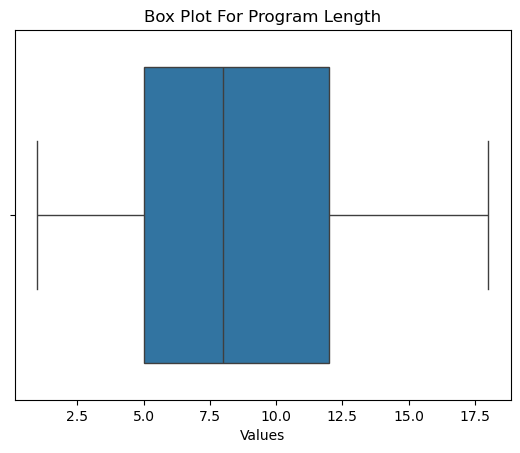

In [22]:
sns.boxplot(x=df["Program Length"])
plt.title("Box Plot For Program Length")
plt.xlabel("Values")
plt.savefig("barplot.png", dpi=300)
plt.show()

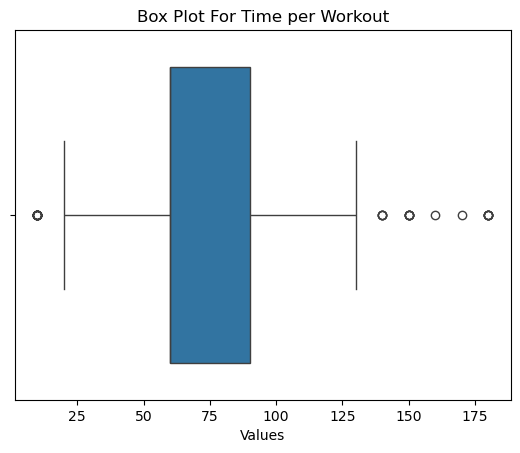

In [23]:
sns.boxplot(x=df["Time per Workout"])
plt.title("Box Plot For Time per Workout")
plt.xlabel("Values")
plt.savefig("barplot.png", dpi=300)
plt.show()

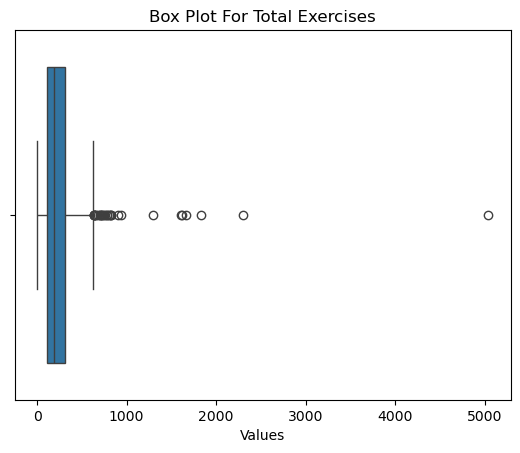

In [24]:
sns.boxplot(x=df["Total Exercises"])
plt.title("Box Plot For Total Exercises")
plt.xlabel("Values")
plt.savefig("barplot.png", dpi=300)
plt.show()

# Outlier Removal for Time per workout

In [25]:
Q1=df["Time per Workout"].quantile(0.25)
Q3=df["Time per Workout"].quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df=df[(df["Time per Workout"]>=lower) &(df["Time per Workout"]<=upper)]


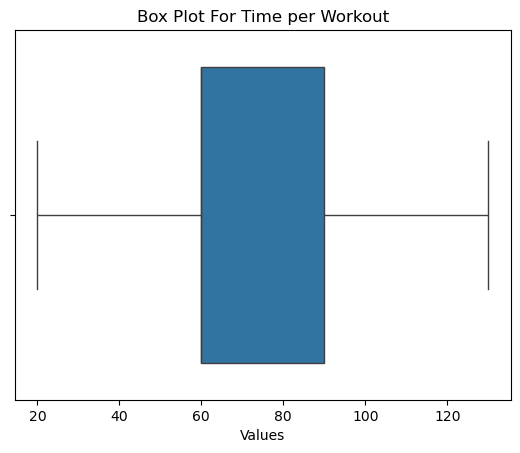

In [26]:
sns.boxplot(x=df["Time per Workout"])
plt.title("Box Plot For Time per Workout")
plt.xlabel("Values")
plt.savefig("barplot.png", dpi=300)
plt.show()

# Outlier Removal for Total Exercises

In [28]:
Q1=df["Total Exercises"].quantile(0.25)
Q3=df["Total Exercises"].quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df=df[(df["Total Exercises"]>=lower) &(df["Total Exercises"]<=upper)]

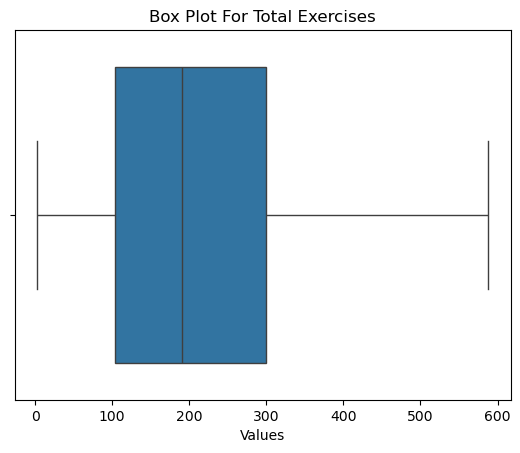

In [29]:
sns.boxplot(x=df["Total Exercises"])
plt.title("Box Plot For Total Exercises")
plt.xlabel("Values")
plt.savefig("barplot.png", dpi=300)
plt.show()

# Scale 

In [30]:
cols_to_scale=["Program Length","Time per Workout","Total Exercises"]

scaler=StandardScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

df.head()

,Program Length,Time per Workout,Total Exercises,Cluster_ID,Advanced,Beginner,Intermediate,Athletics,Bodybuilding,Olympic,Weightlifting,Muscle & Sculpting,Bodyweight Fitness,Powerbuilding,Powerlifting,Equipment
0,0.851282,1.003437,1.327171,4,0,0,1,0,0,0,0,1,1,0,0,1
1,-0.141544,-0.435779,0.104764,3,1,0,1,0,1,0,0,0,0,0,0,1
3,0.354869,0.043960,0.532606,1,1,0,1,0,0,0,0,0,0,1,0,0
4,0.354869,0.523699,1.113250,3,1,0,1,0,1,0,0,1,0,1,1,1
6,0.851282,-0.435779,0.868768,3,0,0,1,0,1,0,0,0,0,0,0,1
